In [1]:
from fft import *
import matplotlib.pyplot as plt

In [2]:
def linear_convolution2d_direct(x, h):
    """
    Compute the linear convolution of 2D arrays x and h using nested loops.
    The output shape is (x_rows + h_rows - 1, x_cols + h_cols - 1).
    """
    x = np.asarray(x, dtype=complex)
    h = np.asarray(h, dtype=complex)
    x_rows, x_cols = x.shape
    h_rows, h_cols = h.shape
    out_rows = x_rows + h_rows - 1
    out_cols = x_cols + h_cols - 1
    y = np.zeros((out_rows, out_cols), dtype=complex)
    for i in range(x_rows):
        for j in range(x_cols):
            for m in range(h_rows):
                for n in range(h_cols):
                    y[i + m, j + n] += x[i, j] * h[m, n]
    return y

def linear_convolution2d_fft(x, h):
    """
    Compute the linear convolution of 2D arrays x and h using FFT.
    Both x and h are zero-padded to shape (x_rows+h_rows-1, x_cols+h_cols-1)
    before computing the FFTs.
    """
    x = np.asarray(x, dtype=complex)
    h = np.asarray(h, dtype=complex)
    x_rows, x_cols = x.shape
    h_rows, h_cols = h.shape
    out_rows = x_rows + h_rows - 1
    out_cols = x_cols + h_cols - 1
    # Zero-pad x and h to the output shape
    x_padded = np.pad(x, ((0, out_rows - x_rows), (0, out_cols - x_cols)))
    h_padded = np.pad(h, ((0, out_rows - h_rows), (0, out_cols - h_cols)))
    X = FFT2D(x_padded)
    H = FFT2D(h_padded)
    Y = IFFT2D(X * H)
    return Y

def convolution2d(x, h):
    """
    Compute the circular convolution of two 2D arrays x and h.
    This assumes x and h are the same shape.
    """
    x = np.asarray(x, dtype=complex)
    h = np.asarray(h, dtype=complex)
    rows, cols = x.shape
    y = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        for j in range(cols):
            for m in range(rows):
                for n in range(cols):
                    y[i, j] += x[m, n] * h[(i - m) % rows, (j - n) % cols]
    return y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if two arrays are almost equal element-wise.
    """
    return np.allclose(a, b, atol=tol)

## Test 1: FFT2D/IFFT2D recovery

In [3]:
x = np.random.random((8, 8)) + 1j * np.random.random((8, 8))
X = FFT2D(x)
x_rec = IFFT2D(X)
print('Original 2D signal:')
print(x)
print('\nRecovered 2D signal:')
print(x_rec)
print('\nFFT2D/IFFT2D recovery successful:', arrays_almost_equal(x, x_rec))

Original 2D signal:
[[0.99335877+8.38968481e-01j 0.64354129+8.35134342e-01j
  0.41060885+7.62716916e-01j 0.42196123+1.07401373e-01j
  0.83139611+9.86356648e-02j 0.44045802+8.82727317e-01j
  0.09052621+1.47580215e-01j 0.19053633+1.61492554e-01j]
 [0.94708   +6.69547292e-01j 0.1111072 +3.31279019e-01j
  0.18300249+1.89176970e-01j 0.45429125+8.83879916e-01j
  0.68176274+3.78848009e-01j 0.08427141+6.90421392e-01j
  0.0915327 +7.84716514e-03j 0.32427764+5.51452957e-01j]
 [0.618606  +9.28320761e-05j 0.58248658+2.61066900e-01j
  0.84121689+3.25368416e-01j 0.1051708 +7.90158159e-01j
  0.55236208+5.38848480e-01j 0.78555964+9.63982802e-01j
  0.85398331+7.06267185e-01j 0.61390015+8.29993711e-01j]
 [0.97762636+4.14330041e-01j 0.66172222+4.92506345e-01j
  0.7323273 +9.74737583e-01j 0.71889316+5.79947518e-01j
  0.09488094+3.48848564e-01j 0.79894482+1.89177339e-01j
  0.45241585+8.37043332e-01j 0.94604032+2.04256451e-01j]
 [0.43672487+2.53849219e-01j 0.55861086+4.00234280e-01j
  0.67827374+1.54680538e

## Test 2: 2D Linear Convolution via FFT vs. Direct Computation

In [4]:
signal = np.random.random((32, 32)) + 1j * np.random.random((32, 32))
filter = np.random.random((5, 5)) + 1j * np.random.random((5, 5))

y_direct = linear_convolution2d_direct(signal, filter)
y_fft = linear_convolution2d_fft(signal, filter)

print('\nDirect 2D convolution shape:', y_direct.shape)
print('FFT-based 2D convolution shape:', y_fft.shape)
print('Convolution and multiplication relationship holds:', arrays_almost_equal(y_direct, y_fft))


Direct 2D convolution shape: (36, 36)
FFT-based 2D convolution shape: (36, 36)
Convolution and multiplication relationship holds: True


## Plot the results for visual verification

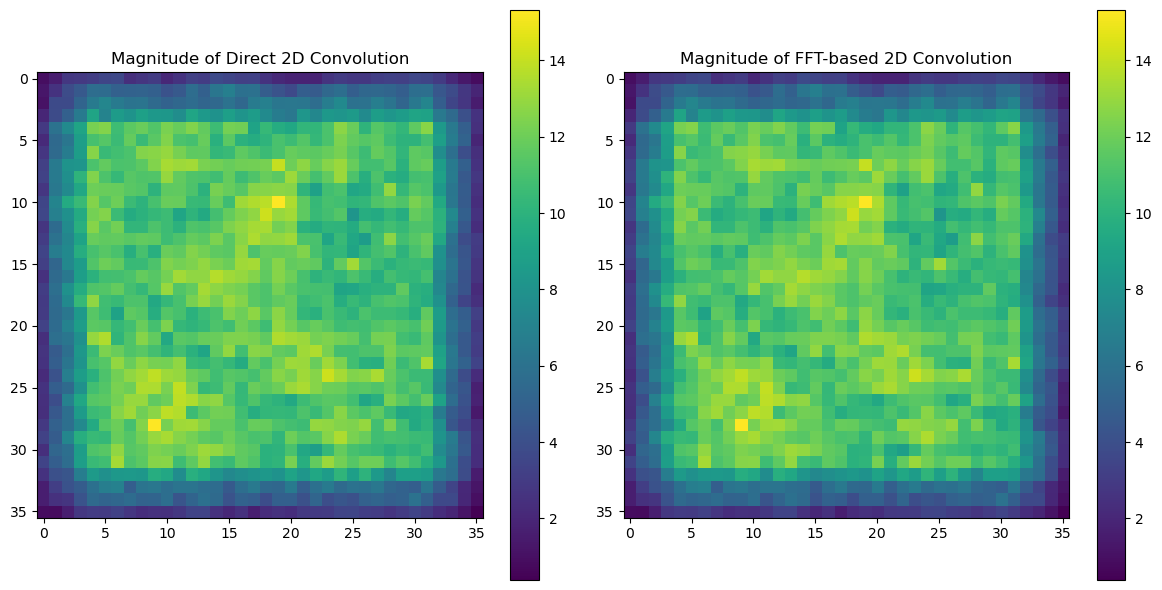

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(y_direct), cmap='viridis')
plt.title('Magnitude of Direct 2D Convolution')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.abs(y_fft), cmap='viridis')
plt.title('Magnitude of FFT-based 2D Convolution')
plt.colorbar()

plt.tight_layout()
plt.show()
